# Project

In this project, I am going to be analysing some data about wine quality and find the distingusing features which characterise wine quality.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [2]:
red_data = pd.read_csv(r"C:\Users\Nikhil\AXA Project\winequality-red.csv")
white_data = pd.read_csv(r"C:\Users\Nikhil\AXA Project\winequality-red.csv")
#labels = pd.read_csv("")
data = pd.concat([red_data, white_data])

In [3]:
print("Lengh of red:", len(red_data))
print("Length of white:", len(white_data))
print("whole data:", len(data))

Lengh of red: 1599
Length of white: 1599
whole data: 3198


In [4]:
data.head()

,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
0,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
1,7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5
2,7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;...
3,11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58...
4,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5


In [5]:
#Rename colume
cols = "fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfer dioxide,density,pH,sulphates,alcohol,quality"
column = cols.split(",")
data.columns = [cols]
data_final = data[cols].str.split(";", expand=True)
data_final.columns = [column]
data_final.columns = ["fixed acidity", "volatile acidity", "citric acid",
                     "residual sugar", "chlorides", "free sulfer dioxide",
                     "total sulfer dioxide", "density", "pH", "sulphates",
                     "alcohol", "quality"]
data_final.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfer dioxide,total sulfer dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0,2.6,0.098,25,67,0.9968,3.2,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15,54,0.997,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17,60,0.998,3.16,0.58,9.8,6
4,7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5


In [6]:
data_final = data_final.astype(float)

data_final.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfer dioxide     float64
total sulfer dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                 float64
dtype: object

In [7]:
data_ready = data_final.drop("quality", axis=1)
labels = data_final["quality"]
labels.head()

0    5.0
1    5.0
2    5.0
3    6.0
4    5.0
Name: quality, dtype: float64

In [8]:
cor_matrix = data_final.corr()
cor_matrix

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfer dioxide,total sulfer dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfer dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfer dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


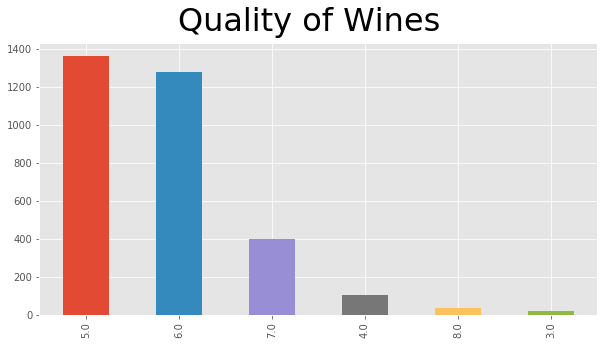

In [9]:
fig = plt.figure(figsize=(10,5))
data_final["quality"].value_counts().plot(kind="bar")
fig.suptitle("Quality of Wines", fontsize=32)
fig.savefig("Quality of wines.png")

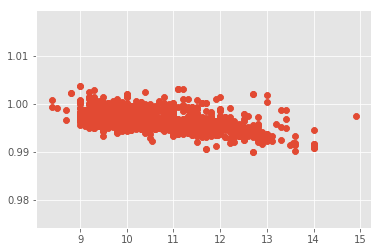

In [10]:
x = data_final["alcohol"]
y = data_final["density"]
plt.scatter(x, y)
plt.show()

There is a big difference between what we are going to be classifying as many of our qualitys of wine which are average with very few in the extremes of 3,4,8

Alcohol content has a strong correlation with the quality of wine as well as volatile acidity.

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_ready, labels, test_size=0.2, random_state=42)

This is a classification problem, we are trying to predict what quality of wine which are discrete values


In [12]:
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.metrics import accuracy_score, make_scorer, f1_score

In [13]:

def train_model(model,title, parameters=None):
    """This function fits the data to our model.
    Uses GridSearchCV to find the best parameters for each model.
    Implements the new parameters.
    Plots a learning curve to show how the model performs.
    Prints accuracy scores for train and Validation set.
    NOTE: Function takes longer to compute with more parameter values"""
    
    model.fit(X_train, y_train.values.ravel())
    y_pred = model.predict(X_train)
    
    print("Model training accuracy score before parameters:", accuracy_score(y_train,y_pred))
    
    if parameters is not None:
        grid_obj = GridSearchCV(model, parameters, scoring=scorer)
        grid_fit = grid_obj.fit(X_train,y_train.values.ravel())
        best_clf = grid_fit.best_estimator_
        best_clf.fit(X_train,y_train)
        y_pred_gridsearch = best_clf.predict(X_train)
        model = best_clf
        print("Model training accuracy score after parameters:", accuracy_score(y_pred_gridsearch, y_train))
        print(best_clf)
    
    train_sizes, train_scores, val_scores = learning_curve(model, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 5))

    train_scores_mean = np.mean(train_scores, axis=1)
    val_scores_mean = np.mean(val_scores, axis=1)

    fig = plt.figure(figsize=(7.5,5))
    plt.plot(train_scores_mean, label="Train Scores")
    plt.plot(val_scores_mean, label="Validation Scores")
    plt.xlabel("Training examples (Standard Devation)")
    plt.ylabel("Score")
    plt.suptitle("Learning curve for model: {}".format(title))
    plt.legend(loc="best")
    plt.show()
    fig.savefig("{}.png".format(title))

Model training accuracy score before parameters: 1.0


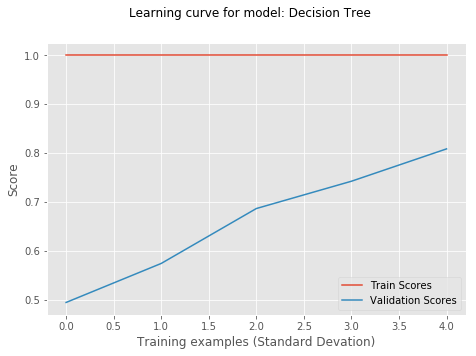

In [14]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()

train_model(tree,"Decision Tree")

Overfitting the data

Model training accuracy score before parameters: 0.5707584050039093


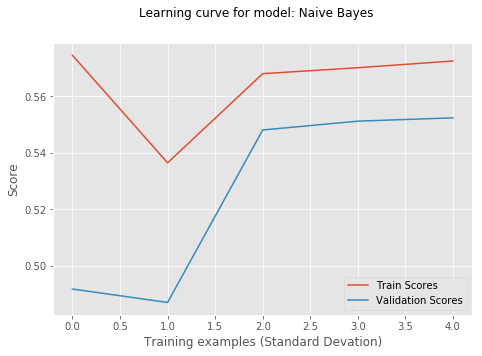

In [15]:
from sklearn.naive_bayes import GaussianNB

naive_bayes = GaussianNB()

train_model(naive_bayes,"Naive Bayes")

Not overfitting the data but getting a low accuracy score.

Model training accuracy score before parameters: 0.5863956215793589


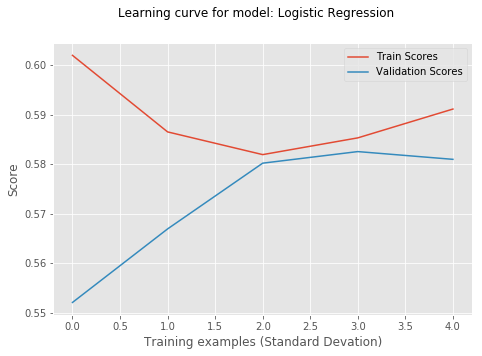

In [16]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

train_model(log_reg, "Logistic Regression")

Once again not overfitting my data however getting a poor accuracy score.

Model training accuracy score before parameters: 0.49257232212666147


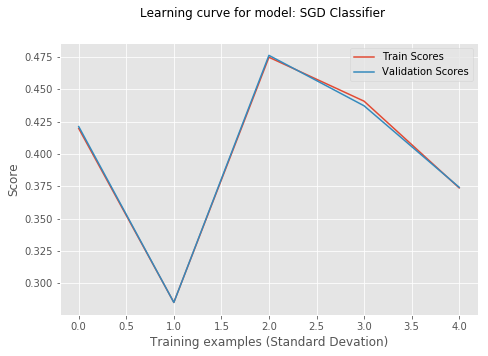

In [17]:
from sklearn.linear_model import SGDClassifier

sgd_classifier = SGDClassifier()

train_model(sgd_classifier, "SGD Classifier")

In [18]:
model = tree.fit(X_train, y_train)

features = model.feature_importances_
len(features)
len(column)

12

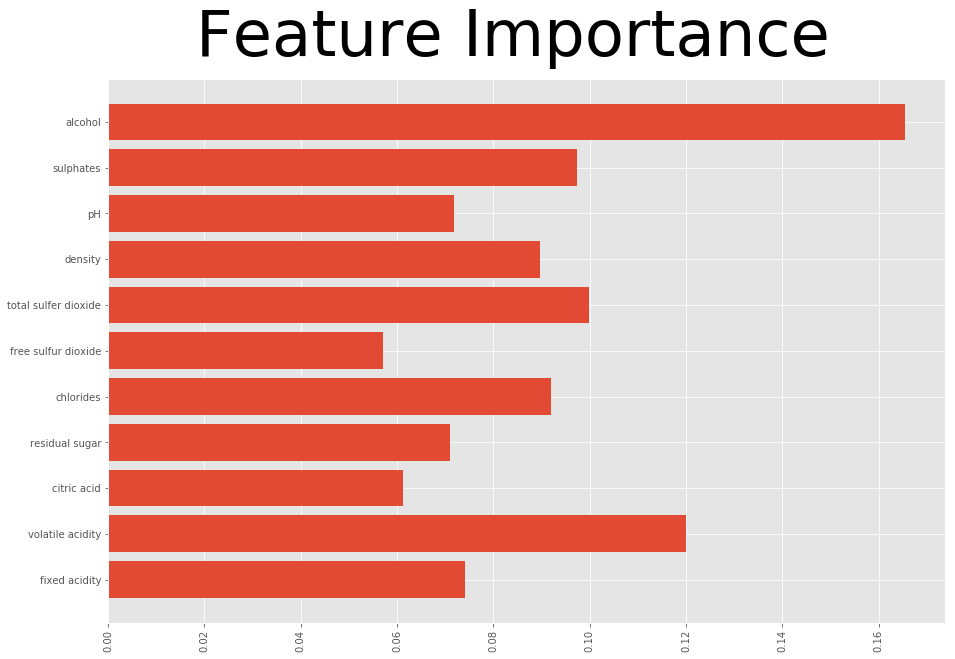

In [19]:
fig = plt.figure(figsize=(15,10))
plt.barh(column[:-1], features)
plt.xticks(rotation='vertical')
plt.suptitle("Feature Importance", fontsize=64)
plt.show()
fig.savefig("feature importance.png")